In [227]:
from cooltools.eigdecomp import cis_eig
import cooler
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as grd
import statistics as st
import pandas as pd

In [213]:
cool = cooler.Cooler('K562_hg19_chr3_50K.cool')
mat = cool.matrix(balance=True)[:]

In [110]:
GC = open("hg19_GC_chr3_50K.txt", "r")
GCarray = []
for line in GC:
    GC_line = line.strip()
    GCarray.append(float(GC_line))
GCarray = np.asarray(GCarray)
GCarray

array([0.     , 0.16752, 0.23058, ..., 0.22148, 0.06538, 0.     ])

In [275]:
hg19_GC = numpy.asarray(f)
compartment = cis_eig(mat, n_eigs = 1, phasing_track = GCarray)
compartment[1]

array([[        nan, -0.07931084,  0.08391484, ...,         nan,
                nan,         nan]])

In [228]:
t = compartment[1][0,:].tolist()
median = []
for c in t:
    if c == "nan":
        continue
    else:
        median.append(c)
st.median(median[1:])

-0.3352187956918631

In [264]:
len(t)

3961

In [277]:
ident = []
for i in range(0, len(t)):
    if t[i] >= 0:
        ident.append("A")
    elif t[i] < 0:
        ident.append("B")
    else:
        ident.append(i+1)


3960

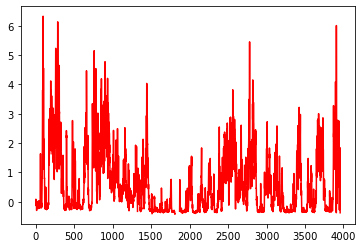

In [235]:
plt.plot(np.arange(compartment[1].shape[1]), t, color = "red")
plt.show()

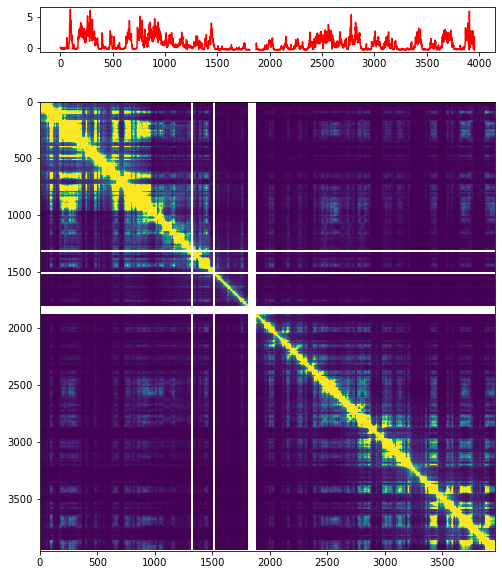

In [236]:
fig = plt.figure(figsize = (10,10))
gs = grd.GridSpec(2, 2, height_ratios=[1,10], width_ratios=[6,1], wspace=0.1)
ax = plt.subplot(gs[2])
ax = ax.imshow(mat,aspect='auto',vmax=3.35)
ax2 = plt.subplot(gs[0])
ax2.plot(np.arange(compartment[1].shape[1]), t, color = "red")
plt.show()

In [135]:
# fig, ax = plt.subplots(nrows = 2, figsize = (15,15
#                                                          ))
# ax[0].imshow(mat, vmax=10)
# ax[1].plot(np.arange(compartment[1].shape[1]), compartment[1][0,:], color = "red")
# fig.show()

## Expression vs. Repression

In [307]:
Exp = pd.read_table("K562_hg19_FPKM_chr3.bed", sep = "\s+", names = ['CHR', 'Start', 
                                                                     'End', 'type', 'Expression', 'Direction'])
H3K27signal = pd.read_table("K562_hg19_FPKM_chr3_mapnorm.bed", sep = "\s+", names = ['CHR', 'Start', 
                                                                     'End', 'Expression', 'Direction', 'Modified Expression'])
Exp

,CHR,Start,End,type,Expression,Direction
0,chr3,238279,451090,CHL1,0.00,+
1,chr3,1134260,1445901,CNTN6,0.00,+
2,chr3,2140497,3099645,CNTN4,0.01,+
3,chr3,3111233,3168297,IL5RA,0.14,-
4,chr3,3168600,3192563,TRNT1,25.28,+
...,...,...,...,...,...,...
1059,chr3,197464050,197514467,FYTTD1,53.14,+
1060,chr3,197518097,197615307,LRCH3,24.13,+
1061,chr3,197615946,197687013,IQCG,3.70,-
1062,chr3,197676858,197683481,RPL35A,1195.67,+


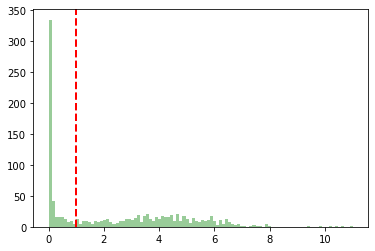

In [308]:
Exp["Expression(log)"] = np.log2(Exp["Expression"] + 1)
plt.hist(Exp["Expression(log)"], bins = 100, alpha = 0.4, color = "green")
plt.axvline(x=1, color='r', linestyle='dashed', linewidth=2)
plt.show()

In [309]:
Exp.drop('Expression', axis = 1)

,CHR,Start,End,type,Direction,Expression(log)
0,chr3,238279,451090,CHL1,+,0.000000
1,chr3,1134260,1445901,CNTN6,+,0.000000
2,chr3,2140497,3099645,CNTN4,+,0.014355
3,chr3,3111233,3168297,IL5RA,-,0.189034
4,chr3,3168600,3192563,TRNT1,+,4.715893
...,...,...,...,...,...,...
1059,chr3,197464050,197514467,FYTTD1,+,5.758623
1060,chr3,197518097,197615307,LRCH3,+,4.651339
1061,chr3,197615946,197687013,IQCG,-,2.232661
1062,chr3,197676858,197683481,RPL35A,+,10.224810


In [310]:
Compartment = []
for i in range(0, 1064):
    if Exp['Expression(log)'][i] >= 1:
        Compartment.append('On')
    else:
        Compartment.append('Off')
Compartment
Exp["State"] = Compartment
Exp

,CHR,Start,End,type,Expression,Direction,Expression(log),State
0,chr3,238279,451090,CHL1,0.00,+,0.000000,Off
1,chr3,1134260,1445901,CNTN6,0.00,+,0.000000,Off
2,chr3,2140497,3099645,CNTN4,0.01,+,0.014355,Off
3,chr3,3111233,3168297,IL5RA,0.14,-,0.189034,Off
4,chr3,3168600,3192563,TRNT1,25.28,+,4.715893,On
...,...,...,...,...,...,...,...,...
1059,chr3,197464050,197514467,FYTTD1,53.14,+,5.758623,On
1060,chr3,197518097,197615307,LRCH3,24.13,+,4.651339,On
1061,chr3,197615946,197687013,IQCG,3.70,-,2.232661,On
1062,chr3,197676858,197683481,RPL35A,1195.67,+,10.224810,On


In [311]:
Exp['start seg'] = Exp['Start']/50000
Exp['end seg'] = Exp['End']/50000
Exp['H3K27'] = v.values
Exp.drop('Direction', axis = 1)

,CHR,Start,End,type,Expression,Expression(log),State,start seg,end seg,H3K27
0,chr3,238279,451090,CHL1,0.00,0.000000,Off,4.76558,9.02180,0.217979
1,chr3,1134260,1445901,CNTN6,0.00,0.000000,Off,22.68520,28.91802,0.212417
2,chr3,2140497,3099645,CNTN4,0.01,0.014355,Off,42.80994,61.99290,0.271694
3,chr3,3111233,3168297,IL5RA,0.14,0.189034,Off,62.22466,63.36594,1.567160
4,chr3,3168600,3192563,TRNT1,25.28,4.715893,On,63.37200,63.85126,0.168837
...,...,...,...,...,...,...,...,...,...,...
1059,chr3,197464050,197514467,FYTTD1,53.14,5.758623,On,3949.28100,3950.28934,0.170634
1060,chr3,197518097,197615307,LRCH3,24.13,4.651339,On,3950.36194,3952.30614,0.174287
1061,chr3,197615946,197687013,IQCG,3.70,2.232661,On,3952.31892,3953.74026,0.264840
1062,chr3,197676858,197683481,RPL35A,1195.67,10.224810,On,3953.53716,3953.66962,0.173857


In [317]:
AB = []
for i in range(0, 1064):
    c = 0.5 * (Exp.iloc[i][8] + Exp.iloc[i][9])
    AB.append(ident[int(c)])
AB
Exp["Compartment"] = AB
Exp

,CHR,Start,End,type,Expression,Direction,Expression(log),State,start seg,end seg,H3K27,Compartment
0,chr3,238279,451090,CHL1,0.00,+,0.000000,Off,4.76558,9.02180,0.217979,B
1,chr3,1134260,1445901,CNTN6,0.00,+,0.000000,Off,22.68520,28.91802,0.212417,B
2,chr3,2140497,3099645,CNTN4,0.01,+,0.014355,Off,42.80994,61.99290,0.271694,B
3,chr3,3111233,3168297,IL5RA,0.14,-,0.189034,Off,62.22466,63.36594,1.567160,A
4,chr3,3168600,3192563,TRNT1,25.28,+,4.715893,On,63.37200,63.85126,0.168837,A
...,...,...,...,...,...,...,...,...,...,...,...,...
1059,chr3,197464050,197514467,FYTTD1,53.14,+,5.758623,On,3949.28100,3950.28934,0.170634,A
1060,chr3,197518097,197615307,LRCH3,24.13,+,4.651339,On,3950.36194,3952.30614,0.174287,A
1061,chr3,197615946,197687013,IQCG,3.70,-,2.232661,On,3952.31892,3953.74026,0.264840,A
1062,chr3,197676858,197683481,RPL35A,1195.67,+,10.224810,On,3953.53716,3953.66962,0.173857,A


In [326]:
Onroi = Exp["State"] == "On"
AExpress = Exp[Onroi][Exp["Compartment"] == "A"]
BExpress = Exp[Onroi][Exp["Compartment"] == "B"]

Offroi = Exp["State"] == "Off"
ASil = Exp[Offroi][Exp["Compartment"] == "A"]
BSil = Exp[Offroi][Exp["Compartment"] == "B"]

/Users/cmdb/miniconda3/envs/hic/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/cmdb/miniconda3/envs/hic/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/cmdb/miniconda3/envs/hic/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/cmdb/miniconda3/envs/hic/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [332]:
import seaborn as sns

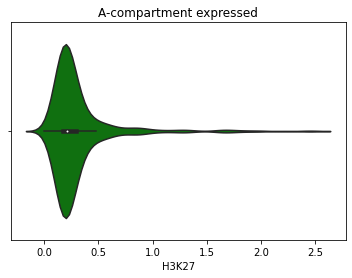

In [336]:
ax = sns.violinplot(x=AExpress["H3K27"], color = "green")
ax.set_title("A-compartment expressed")
plt.show()

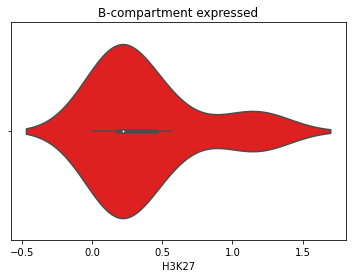

In [337]:
ax = sns.violinplot(x=BExpress["H3K27"], color = "red")
ax.set_title("B-compartment expressed")
plt.show()

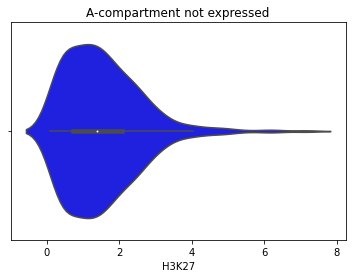

In [338]:
ax = sns.violinplot(x=ASil["H3K27"], color = "blue")
ax.set_title("A-compartment not expressed")
plt.show()

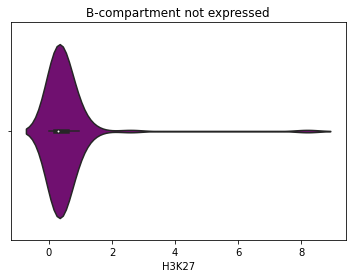

In [339]:
ax = sns.violinplot(x=BSil["H3K27"], color = "purple")
ax.set_title("B-compartment not expressed")
plt.show()

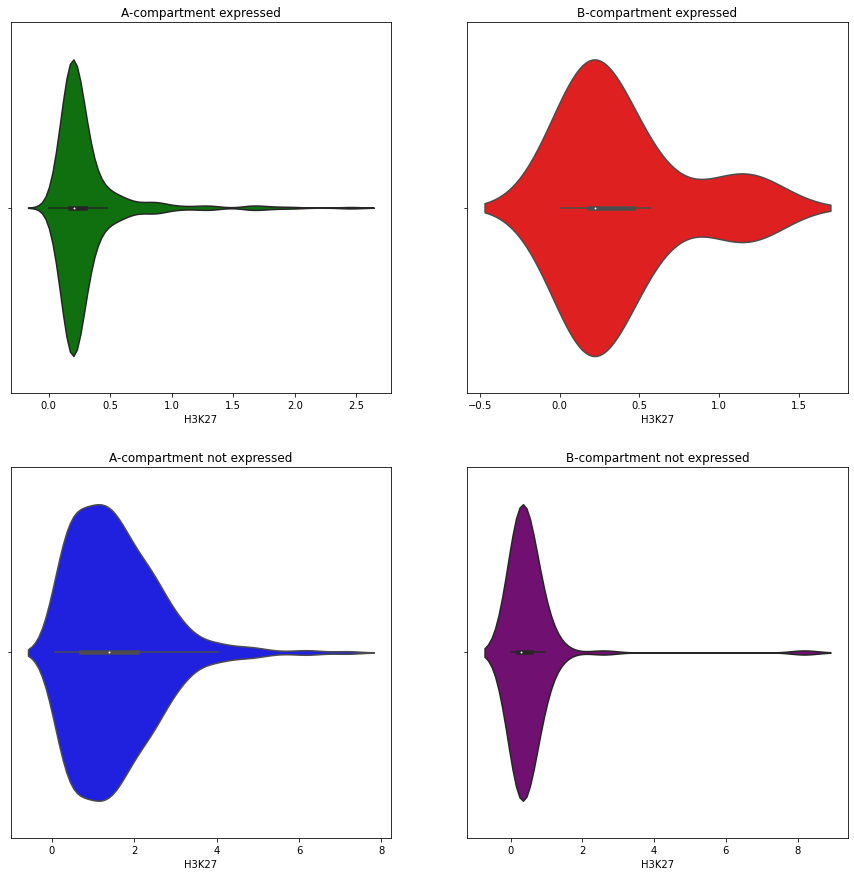

In [349]:
fig, axes = plt.subplots(2 ,2, figsize = (15,15))
sns.violinplot(x=AExpress["H3K27"], color = "green", ax = axes[0, 0])
axes[0, 0].set_title("A-compartment expressed")

sns.violinplot(x=BExpress["H3K27"], color = "red", ax = axes[0 ,1])
axes[0, 1].set_title("B-compartment expressed")

sns.violinplot(x=ASil["H3K27"], color = "blue", ax = axes[1, 0])
axes[1, 0].set_title("A-compartment not expressed")

sns.violinplot(x=BSil["H3K27"], color = "purple", ax = axes[1,1])
axes[1, 1].set_title("B-compartment not expressed")
plt.show()